In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# checking for duplicate rows
df.duplicated().sum()


np.int64(0)

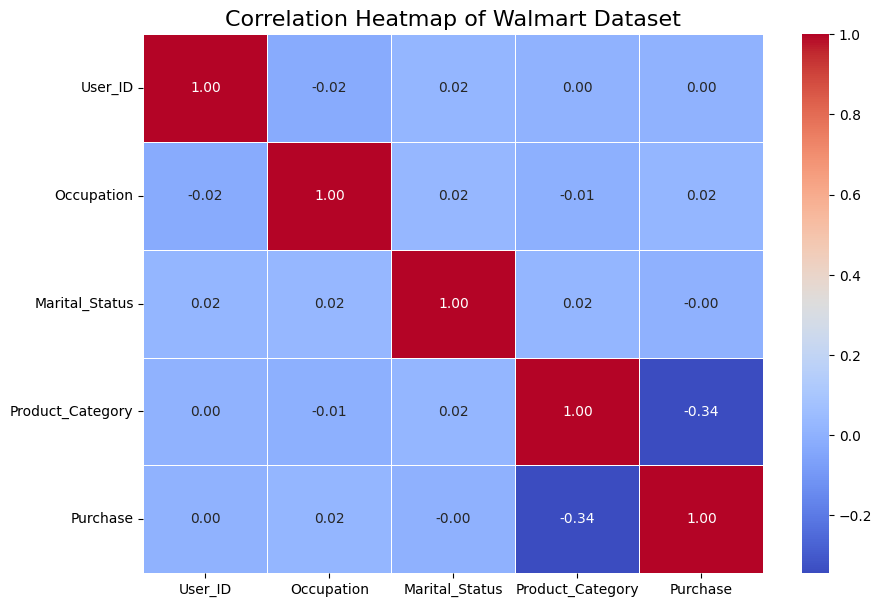

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Walmart Dataset", fontsize=16)
plt.show()


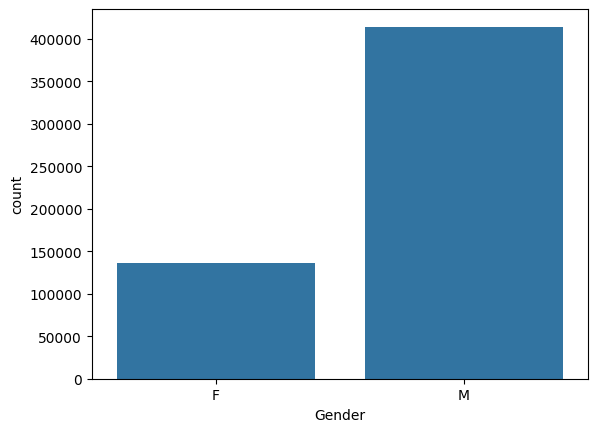

In [ ]:
#comparing M vs F . count of who made more purchases. Males did more purchases
sns.countplot(data=df,x="Gender")
plt.show()

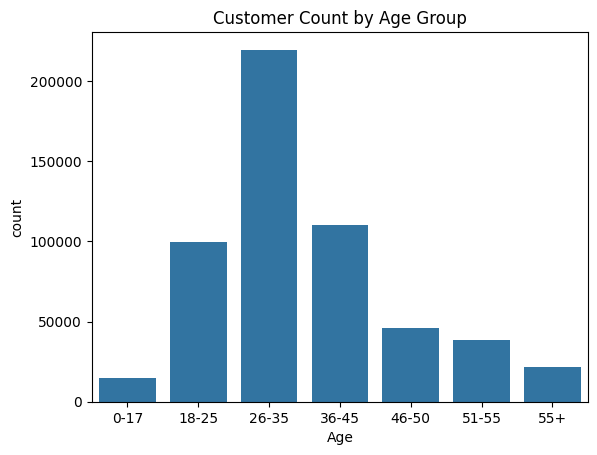

In [ ]:
#People between the age group of 26-35 made moasst purchases followed by 36-45 and 18-25
sns.countplot(data=df, x='Age', order=sorted(df['Age'].unique()))
plt.title("Customer Count by Age Group")
plt.show()


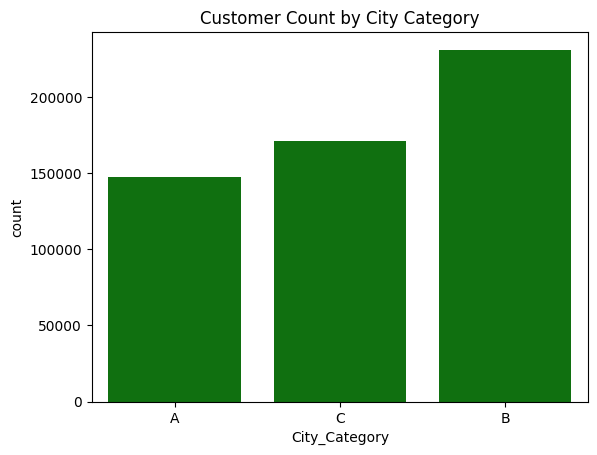

In [ ]:
# city B has most customers by count
sns.countplot(data=df, x='City_Category',color='green')
plt.title("Customer Count by City Category")
plt.show()


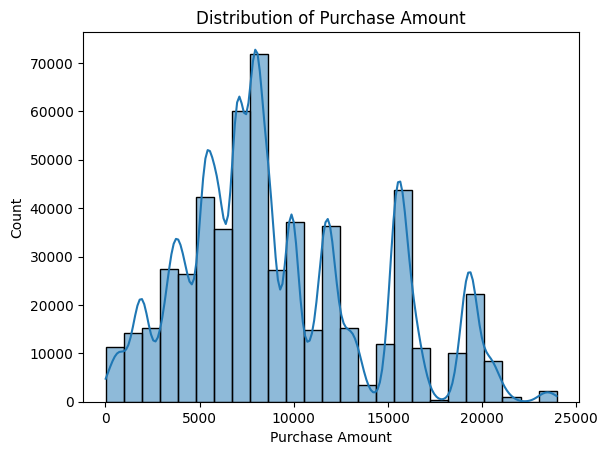

In [ ]:
# distribution of purchase amount shows many customer made small purchases, different peaks shows different customer and product types
sns.histplot(df['Purchase'], bins=25, kde=True)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.show()


In [ ]:
#Average Purchase by Gender
female_purchase = df[df['Gender'] == 'F']['Purchase']
male_purchase = df[df['Gender'] == 'M']['Purchase']
average_female_purchase = female_purchase.mean()
average_male_purchase = male_purchase.mean()
print(f"Average Purchase for Female Customers: {average_female_purchase}")
print(f"Average Purchase for Male Customers: {average_male_purchase}")

Average Purchase for Female Customers: 8734.565765155476
Average Purchase for Male Customers: 9437.526040472265


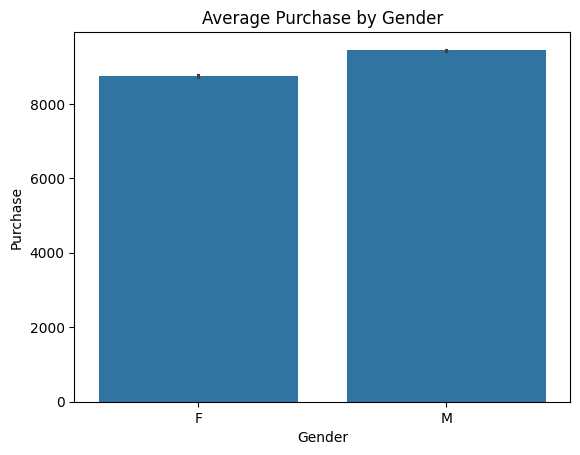

In [ ]:
sns.barplot(data=df, x='Gender', y='Purchase')
plt.title("Average Purchase by Gender")
plt.show()

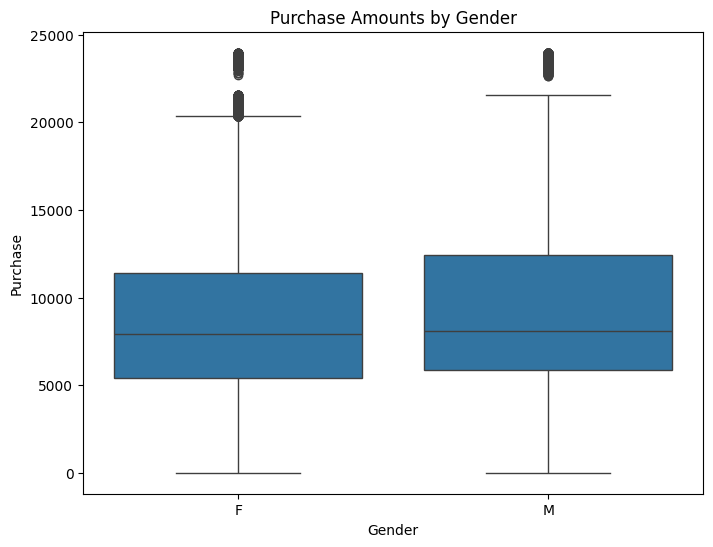

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amounts by Gender')
plt.show()

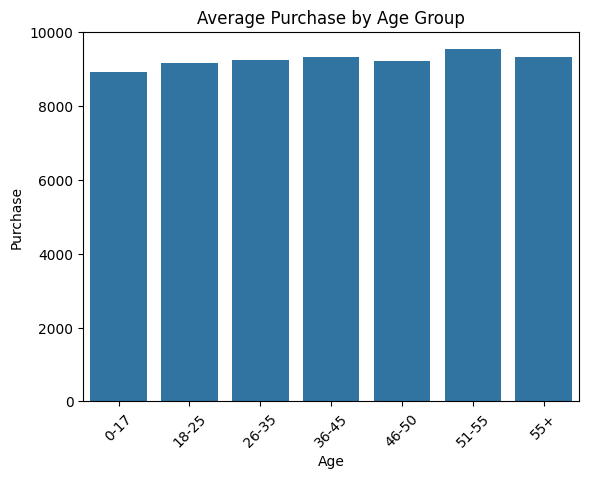

In [ ]:

sns.barplot(data=df, x='Age', y='Purchase', ci=None, order=sorted(df['Age'].unique()))
plt.title("Average Purchase by Age Group")
plt.xticks(rotation=45)
plt.show()


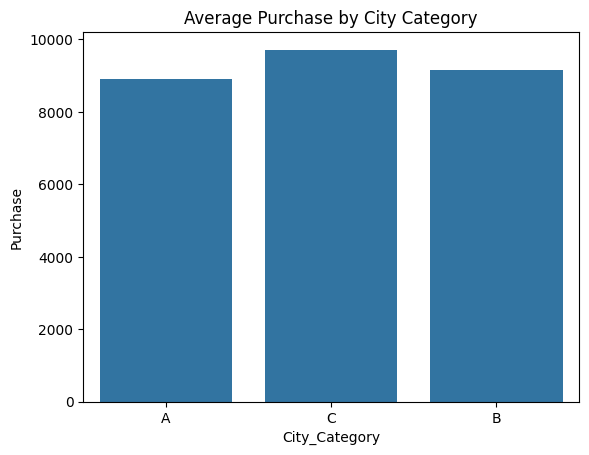

In [ ]:
# By average purchase city C leads than city B than City A
sns.barplot(data=df, x='City_Category', y='Purchase', estimator='mean', ci=None)
plt.title("Average Purchase by City Category")
plt.show()


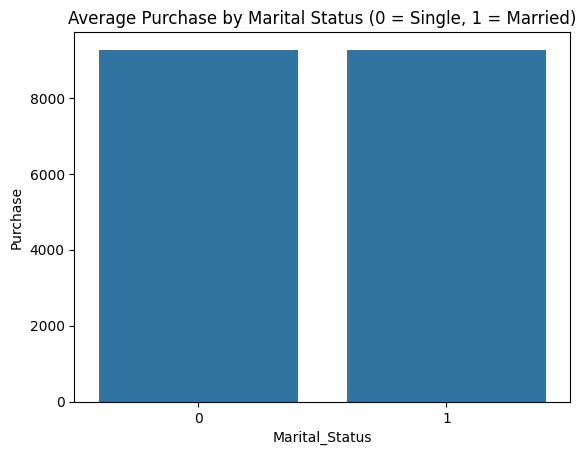

In [ ]:
# By maritial status
sns.barplot(data=df, x='Marital_Status', y='Purchase', estimator='mean', ci=None)
plt.title("Average Purchase by Marital Status (0 = Single, 1 = Married)")
plt.show()


In [ ]:
# Group by Product_ID and sum up the Purchase amounts
top_products = df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False)
top_products_df = top_products.reset_index()
top_products_df.head(10)

,Product_ID,Purchase
0,P00025442,27995166
1,P00110742,26722309
2,P00255842,25168963
3,P00059442,24338343
4,P00184942,24334887
5,P00112142,24216006
6,P00110942,23639564
7,P00237542,23425576
8,P00057642,23102780
9,P00010742,22164153


In [ ]:
#Confidence interval for female
n_female = len(female_purchase)
mean_female = average_female_purchase
std_female = female_purchase.std()

#Calculate the 95% confidence interval
z_score = 1.96  # Z-score for 95% confidence level
margin_of_error_female = z_score * (std_female / np.sqrt(n_female))

#Calculate the confidence interval
confidence_interval_female = (mean_female - margin_of_error_female, mean_female + margin_of_error_female)
print(f"95% Confidence Interval for Female Customers' Spending: {confidence_interval_female}")


95% Confidence Interval for Female Customers' Spending: (np.float64(8709.211081242413), np.float64(8759.920449068539))


In [ ]:
#Confidence interval for male
n_male = len(male_purchase)
mean_male = average_male_purchase
std_male = male_purchase.std()
margin_of_error_male = z_score * (std_male / np.sqrt(n_male))
confidence_interval_male = (mean_male - margin_of_error_male, mean_male + margin_of_error_male)
print(f"95% Confidence Interval for Male Customers' Spending: {confidence_interval_male}")


95% Confidence Interval for Male Customers' Spending: (np.float64(9422.019162420047), np.float64(9453.032918524483))


In [ ]:
''' There is no overlapppiung between the confidence interval of m and f so
Male customers spend significantly more per transaction than female customers.'''

 # recommendations and action items to Walmart.
 '''Promote high-ticket products like electronics, gadgets, tools, appliances to male customers.
   Launch exclusive offers or premium membership programs targeted toward male customers.
   For Female
   Introduce bundled deals (e.g., buy 2 get 1 free) for categories that females prefer (fashion, beauty, home decor).
   Create loyalty programs or cashback offers specifically aimed at boosting the average purchase value among female customers.
   Walmart can now confidently segment marketing based on gender
   sending different types of promotions/offers to male and female customers to maximize revenues.
   In stores or online, position high-ticket items prominently for male buyers.
   Showcase value deals and curated collections for female buyers to encourage multiple smaller purchases.'''
   #  Male customers at Walmart spend significantly more per transaction than female customers, and this insight can be
   #  leveraged through gender-specific marketing and product targeting strategies




In [ ]:
married_purchase = df[df['Marital_Status'] == 1]['Purchase']
unmarried_purchase = df[df['Marital_Status'] == 0]['Purchase']
mean_married = married_purchase.mean()
mean_unmarried = unmarried_purchase.mean()
# Sample sizes
n_married = len(married_purchase)
n_unmarried = len(unmarried_purchase)

# Standard errors
se_married = np.std(married_purchase, ddof=1) / np.sqrt(n_married)
se_unmarried = np.std(unmarried_purchase, ddof=1) / np.sqrt(n_unmarried)

# 95% Confidence Intervals
ci_married = stats.norm.interval(0.95, loc=mean_married, scale=se_married)
ci_unmarried = stats.norm.interval(0.95, loc=mean_unmarried, scale=se_unmarried)

print(f"95% Confidence Interval for Married: {ci_married}")
print(f"95% Confidence Interval for Unmarried: {ci_unmarried}")

95% Confidence Interval for Married: (np.float64(9240.460427057078), np.float64(9281.888721107669))
95% Confidence Interval for Unmarried: (np.float64(9248.61641818668), np.float64(9283.198819656332))


In [ ]:
''' The intervals for married and unmarried customers overlaps meaning
No significant difference in average spending between married and unmarried customers
therefore Walmart should not heavily differentiate marketing strategies based on marital status alone.
Focus on other factors like Age, Gender, Occupation, Product Categories for better segmentation.'''

In [ ]:
# Mean Purchase by Age
age_means = df.groupby('Age')['Purchase'].mean()
print(age_means)


# Create a dictionary to store Confidence Intervals
age_conf_intervals = {}

# Loop through each age group
for age_group in df['Age'].unique():
    purchase_values = df[df['Age'] == age_group]['Purchase']
    mean_purchase = purchase_values.mean()
    n = len(purchase_values)
    se = np.std(purchase_values, ddof=1) / np.sqrt(n)

    ci = stats.norm.interval(0.95, loc=mean_purchase, scale=se)
    age_conf_intervals[age_group] = ci


for age, ci in age_conf_intervals.items():
    print(f"Age Group: {age}, 95% Confidence Interval: {ci}")


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
Age Group: 0-17, 95% Confidence Interval: (np.float64(8851.947970542686), np.float64(9014.981310347262))
Age Group: 55+, 95% Confidence Interval: (np.float64(9269.29883441773), np.float64(9403.262084481079))
Age Group: 26-35, 95% Confidence Interval: (np.float64(9231.73367640003), np.float64(9273.647589339746))
Age Group: 46-50, 95% Confidence Interval: (np.float64(9163.085142648752), np.float64(9254.166252287903))
Age Group: 51-55, 95% Confidence Interval: (np.float64(9483.991472776577), np.float64(9585.624589143894))
Age Group: 36-45, 95% Confidence Interval: (np.float64(9301.669410965314), np.float64(9361.031978870433))
Age Group: 18-25, 95% Confidence Interval: (np.float64(9138.407948753442), np.float64(9200.919263769136))


In [ ]:
#Insights for age
'''Age impacts purchasing behavior.
   Customers aged 26-55 are the most profitable for Walmart.
   Customers under 25 and above 55 spend less in comparison.

   #Recommendation
     Target marketing campaigns heavily towards 26-55 years age bracket.
     For 18-25, Walmart can introduce loyalty programs, discounts, EMI options to boost spending.
     For 0-17 age group, focus more on toys, electronics, school supplies at attractive prices.
     For 51-55, Walmart can offer premium quality products, healthcare-related items, and personalized services.'''